After I finish exploring the data, I would like to make a comparison between some companies and universities

In [159]:
# import library 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [160]:
# ready the data set 
df=pd.read_csv('data.csv')

In [161]:
#show the columns 
df.columns

Index(['Unnamed: 0', 'userId', 'company', 'jobTitle', 'company2', 'jobTitle2',
       'school', 'schoolDegree', 'schoolDegree2', 'skill1', 'skill2', 'skill3',
       'skill4', 'skill5', 'skill6', 'jobLocation2', 'SchoolDegree',
       'type_skills'],
      dtype='object')

In [162]:
# drop 
df.drop(columns=['Unnamed: 0'],inplace=True)

Choosing Saudi Aramco

In [163]:
# variable to save only Saudi Aramco employees
saudi_aramco = df[df['company']=='saudi aramco'] 


In [164]:
# To replace the name of the university
saudi_aramco['school']= saudi_aramco['school'].str.replace('king fahd university of petroleum & minerals - kfupm','king fahd university of petroleum & minerals')
saudi_aramco['school']= saudi_aramco['school'].str.replace('king fahd university of petroleum and minerals','king fahd university of petroleum & minerals')

/var/folders/q9/r2j6s5gj6vqbgwbptm3ztjsc0000gn/T/ipykernel_1891/2168153571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saudi_aramco['school']= saudi_aramco['school'].str.replace('king fahd university of petroleum & minerals - kfupm','king fahd university of petroleum & minerals')
/var/folders/q9/r2j6s5gj6vqbgwbptm3ztjsc0000gn/T/ipykernel_1891/2168153571.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saudi_aramco['school']= saudi_aramco['school'].str.replace('king fahd university of petroleum an

In [165]:
#top_skills['index'] = top_skills['index'].str.replace('Python','Python (Programming Language)',regex=True)

What are the universities that graduate people working in Aramco ?

In [166]:
#What are the universities that graduate people working in Aramco?
saudi_aramco_uni = (saudi_aramco['school'].value_counts(normalize=True)*100).head(6)
saudi_aramco_uni = saudi_aramco_uni.drop(labels = ['udacity']) 

saudi_aramco_uni

king fahd university of petroleum & minerals                  11.904762
imam abdulrahman bin faisal university                        11.904762
kaust (king abdullah university of science and technology)     4.761905
king faisal university                                         4.761905
university of colorado boulder                                 4.761905
Name: school, dtype: float64

In [167]:
# Save the output in the data frame and add a variable in which the index is saved
saudi_aramco_uni = saudi_aramco_uni.to_frame()
saudi_aramco_uni['index'] = saudi_aramco_uni.index
saudi_aramco_uni

,school,index
king fahd university of petroleum & minerals,11.904762,king fahd university of petroleum & minerals
imam abdulrahman bin faisal university,11.904762,imam abdulrahman bin faisal university
kaust (king abdullah university of science and technology),4.761905,kaust (king abdullah university of science and...
king faisal university,4.761905,king faisal university
university of colorado boulder,4.761905,university of colorado boulder


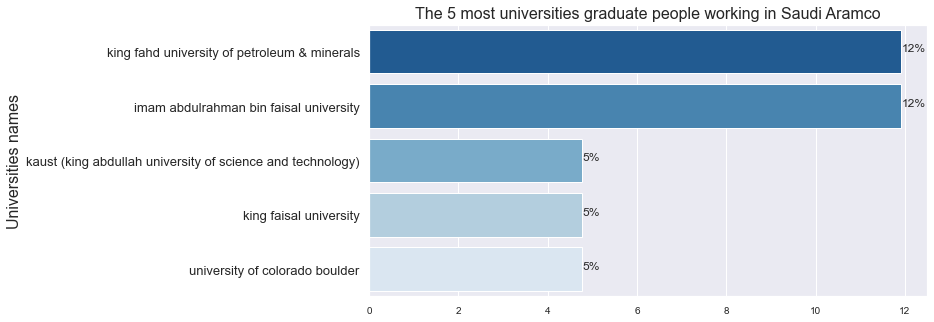

In [168]:
# plot1 real 

fig, ax= plt.subplots(figsize =(10,5))
#ns.set_style('whitegrid')
sns.set_context('notebook')
sns.set(font_scale=1)
plt.fontsize =(16)

ax=sns.barplot(palette="Blues_r",ax=ax,

            x=saudi_aramco_uni['school'],y=saudi_aramco_uni['index'])
total=len(saudi_aramco_uni['index'])
for p in ax.patches:
    percentage ='{:,.0f}%'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

plt.xticks(rotation =0,fontsize =10)
plt.yticks(rotation =0,fontsize =13)

plt.title('The 5 most universities graduate people working in Saudi Aramco',
         fontsize =16
         )
plt.xlabel ('',fontsize =16)
plt.ylabel ('Universities names',fontsize =16)

plt.show ()

In [169]:
# Departments of employees of Aramco
#Determine the frequency of departments
saudi_aramco_degree = saudi_aramco['SchoolDegree'].value_counts(normalize=True)*100
saudi_aramco_degree = saudi_aramco_degree.drop(labels = ['Unkown']) 
saudi_aramco_degree

Computer Science                  28.571429
Information Systems               11.904762
Computer Engineering               9.523810
Management Information Systems     7.142857
Information Technology             7.142857
Software Engineeringe              4.761905
Name: SchoolDegree, dtype: float64

In [170]:
# change the type saudi_aramco_degree ro data frame 
saudi_aramco_degree = saudi_aramco_degree.to_frame()
saudi_aramco_degree['index'] = saudi_aramco_degree.index
saudi_aramco_degree


,SchoolDegree,index
Computer Science,28.571429,Computer Science
Information Systems,11.904762,Information Systems
Computer Engineering,9.523810,Computer Engineering
Management Information Systems,7.142857,Management Information Systems
Information Technology,7.142857,Information Technology
Software Engineeringe,4.761905,Software Engineeringe


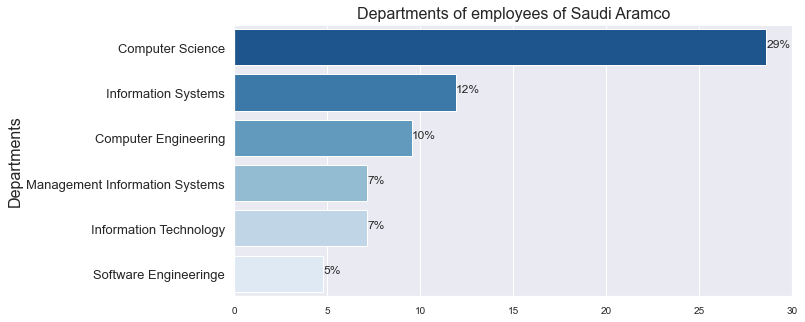

In [171]:
# plot1 real 

fig, ax= plt.subplots(figsize =(10,5))
#ns.set_style('whitegrid')
sns.set_context('notebook')
sns.set(font_scale=1)
plt.fontsize =(16)
# Determine the columns
ax=sns.barplot(palette="Blues_r",ax=ax,

            x=saudi_aramco_degree['SchoolDegree'],y=saudi_aramco_degree['index'])
total=len(saudi_aramco_degree['index'])
for p in ax.patches:
    percentage ='{:,.0f}%'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

plt.xticks(rotation =0,fontsize =10)
plt.yticks(rotation =0,fontsize =13)
#title
plt.title('Departments of employees of Saudi Aramco',
         fontsize =16
         )
plt.xlabel ('',fontsize =16)
plt.ylabel ('Departments',fontsize =16)

plt.show ()

In [172]:
# Concatenate all the skills of Aramco employees
skills= pd.concat(([saudi_aramco["skill1"],saudi_aramco["skill2"],saudi_aramco["skill3"],saudi_aramco["skill4"],saudi_aramco["skill5"],saudi_aramco["skill6"]]),ignore_index=True, sort=False)


In [173]:
skills

0          Machine Learning
1      Software Engineering
2          Microsoft Office
3                  Teamwork
4             Data Analysis
               ...         
247                     NaN
248         Problem Solving
249                     NaN
250      Data Visualization
251                     NaN
Length: 252, dtype: object

In [174]:
type(skills)

pandas.core.series.Series

In [175]:
# Convert a variable's type to a data frame
skills = skills.to_frame() 

In [176]:
#Create a variable to save all skills
skills['s']= pd.concat(([saudi_aramco["skill1"],saudi_aramco["skill2"],saudi_aramco["skill3"],saudi_aramco["skill4"],saudi_aramco["skill5"],saudi_aramco["skill6"]]),ignore_index=True, sort=False)
#skills= skills['s'].str.replace('Python','Python (Programming Language)')


In [177]:
# A function that returns the type of a skill. Is it a programming language or a soft skill?
def find_skills(s):
    if( s.find('SQL') != -1 or s.find('Java') != -1  or s.find('R ') != -1 or s.find('C++') != -1 or s.find('Python') != -1 or 
        s.find('MySQL') != -1 or s.find('C#') != -1 or s.find('PHP') != -1 or  s.find('R (Programming Language)') != -1 
         or s.find('PL/SQL') != -1 or s.find('ASP.NET') != -1 or s.find('React.js') != -1 or s.find('java') != -1 or
         s.find('Flutter') != -1 or s.find('.NET') != -1 or s.find('.NET') != -1 or s.find('R Programing') != -1 or s.find('JavaScript') != -1):  
        return 'programming languages'
    # elif( s.find('Microsoft Office') != -1 or s.find('Tableau') != -1  or s.find('Microsoft SQL Server') != -1 or s.find('Microsoft Excel') != -1 or s.find('Matlab') != -1 
      #  or s.find('Kubernetes') != -1 or s.find('SAS') != -1 or s.find('Amazon S3') != -1 or s.find('Linux') != -1 or  s.find('Databases') != -1 
      #   or s.find('User Experience (UX)') != -1 or s.find('SDLC') != -1 or s.find('Machine Learning') != -1 or s.find('Data Visualization') != -1 or
      #   s.find('Data Science') != -1 or s.find('Data Analysis') != -1 or s.find('Data Mining') != -1 or s.find('Business Intelligence') != -1 
      #   or s.find('Research') != -1 or s.find('Enterprise Project Management (EPM)') != -1 or s.find('ERP)') != -1 or s.find('Artificial intelligence (AI)') != -1
      #   or s.find('Cloud Computing') != -1 or s.find('Deep Learning') != -1 or s.find('Cybersecurity') != -1 or s.find('Statistics') != -1 or s.find(' Web Scraping') != -1
      #   or s.find('Information Security') != -1 or s.find('Internet of Things') != -1 or s.find('Geophysics') != -1 or s.find('AWS IoT') != -1 or s.find('SPSS') != -1
      #   or s.find('Web Development') != -1 or s.find('Big Data Analytics') != -1 or s.find('Computer Vision') != -1 or s.find('NLP') != -1 or s.find('Power pi') != -1
      #   or s.find('Microsoft Power BI') != -1 or s.find('ETL') != -1 ): 
      #  return 'technical concepts' 
    
    
    elif( s.find('Communication skills') != -1 or s.find('Management') != -1  or s.find('Public Speaking') != -1 or s.find('Teamwork') != -1 or s.find('Problem Solving') != -1 
        or s.find('Time management') != -1 or s.find('Problem Solving') != -1 or s.find('Leadership') != -1 or s.find('Team Leadership') != -1 or  s.find('statistical reports') != -1 
         or s.find('Research') != -1 or s.find('Project Management') != -1 or s.find('Self Learning') != -1 or s.find('Critical Thinking') != -1 ): 
        return 'Soft skills'
    
    else:
        return 'Unkown'

In [178]:
skills.head()


,0,s
0,Machine Learning,Machine Learning
1,Software Engineering,Software Engineering
2,Microsoft Office,Microsoft Office
3,Teamwork,Teamwork
4,Data Analysis,Data Analysis


In [179]:
# change the type of varible 
skills['s']= skills['s'].astype(str)


In [180]:
# apply the function 
skills['Type'] = skills['s'].apply(find_skills) 

In [181]:
# Select only programming languages
programming_languages = skills[skills['Type']=='programming languages'] 

programming_languages.head(10) 

,0,s,Type
13,Python (Programming Language),Python (Programming Language),programming languages
16,Python,Python,programming languages
22,Python,Python,programming languages
27,Python,Python,programming languages
42,C++,C++,programming languages
55,C++,C++,programming languages
70,Python (Programming Language),Python (Programming Language),programming languages
97,SQL,SQL,programming languages
106,Java,Java,programming languages
110,Java,Java,programming languages


In [182]:
# Select only the most frequent languages
#top_skills = (programming_languages['s'].value_counts(normalize=True)*100).head(10)


In [183]:
top_skills = (programming_languages['s'].value_counts(normalize=True)*100).head(10)
top_skills = top_skills.to_frame()
top_skills['index']=top_skills.index

top_skills

,s,index
Python,23.809524,Python
Java,23.809524,Java
Python (Programming Language),19.047619,Python (Programming Language)
C++,14.285714,C++
SQL,9.523810,SQL
PHP,4.761905,PHP
MySQL,4.761905,MySQL


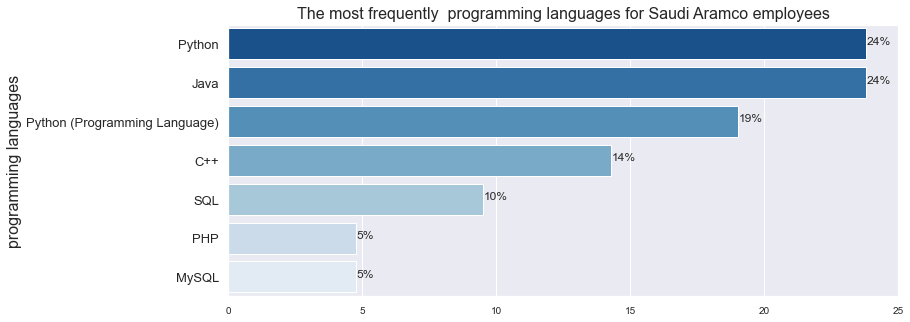

In [184]:
# plot1 real 

fig, ax= plt.subplots(figsize =(12,5))
#ns.set_style('whitegrid')
sns.set_context('notebook')
sns.set(font_scale=1)
plt.fontsize =(16)
# choose the varible and color
ax=sns.barplot(palette="Blues_r",ax=ax,

            x=top_skills['s'],y=top_skills['index'])
total=len(top_skills['index'])
# To create proportions on the graph
for p in ax.patches:
    percentage ='{:,.0f}%'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))
# Rotation ratio and font size in axes
plt.xticks(rotation =0,fontsize =10)
plt.yticks(rotation =0,fontsize =13)
# titile 
plt.title('The most frequently  programming languages for Saudi Aramco employees',
         fontsize =16
         )
plt.xlabel ('',fontsize =16)
plt.ylabel ('programming languages',fontsize =16)

plt.show ()

In [185]:
# # Select only soft skills 
Soft_skills = skills[skills['Type']=='Soft skills'] 
Soft_skills.head(10) 

,0,s,Type
3,Teamwork,Teamwork,Soft skills
19,Public Speaking,Public Speaking,Soft skills
20,Reservoir Management,Reservoir Management,Soft skills
23,Self Learning,Self Learning,Soft skills
24,Public Speaking,Public Speaking,Soft skills
38,Leadership,Leadership,Soft skills
44,Research,Research,Soft skills
53,Self Learning,Self Learning,Soft skills
65,Problem Solving,Problem Solving,Soft skills
73,Data Management,Data Management,Soft skills


In [186]:
# # Save 10 recurrent skills
top_skills = (Soft_skills['s'].value_counts(normalize=True)*100).head(10)

In [187]:
# Create a variable to save the index
top_skills = top_skills.to_frame()
top_skills['index']=top_skills.index

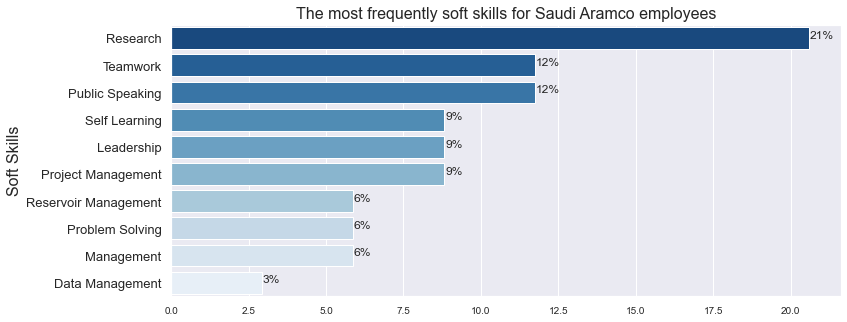

In [188]:
# plot1 real 

fig, ax= plt.subplots(figsize =(12,5))
#ns.set_style('whitegrid')
sns.set_context('notebook')
sns.set(font_scale=1)
plt.fontsize =(16)

ax=sns.barplot(palette="Blues_r",ax=ax,

            x=top_skills['s'],y=top_skills['index'])
total=len(top_skills['index'])
for p in ax.patches:
    percentage ='{:,.0f}%'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

plt.xticks(rotation =0,fontsize =10)
plt.yticks(rotation =0,fontsize =13)

plt.title('The most frequently soft skills for Saudi Aramco employees',
         fontsize =16
         )
plt.xlabel ('',fontsize =16)
plt.ylabel ('Soft Skills',fontsize =16)

plt.show ()

In [189]:
# A function that returns degrees
def schoolDegree(schoolDegree,schoolDegree2):
    schoolDegree =  str(schoolDegree)
    schoolDegree2 =  str(schoolDegree2)
    #schoolDegree2 =  str(schoolDegree2)
    rent = "Unkown" 
    if( schoolDegree.find('Doctor') != -1 or schoolDegree.find('Phd') != -1 or schoolDegree.find('Phd') != -1 or schoolDegree.find('PhD') != -1 or schoolDegree.find('Ph.D.') != -1 
    or schoolDegree.find('Ph.D') != -1 or schoolDegree2.find('Ph.D') != -1 or schoolDegree2.find('Doctor') != -1 or schoolDegree2.find('Phd') != -1 or schoolDegree2.find('Phd') != -1
     or schoolDegree2.find('PhD') != -1): 
     rent = 'Phd'
    elif( schoolDegree.find('Master') != -1 or schoolDegree2.find('Master') != -1):
        rent = 'Master' 
    elif( schoolDegree.find('Bachelor') != -1 or schoolDegree.find('البكالوريوس') != -1 or schoolDegree.find('B.S.')!= -1 or schoolDegree.find('B.E')!= -1 or schoolDegree.find('BCS') != -1 or 
          schoolDegree.find('BS') != -1 or schoolDegree.find("Engineer's") != -1 or schoolDegree.find('B.Tech') != -1 or schoolDegree.find(' BSc') != -1 or schoolDegree.find('BCA')!= -1 or 
           schoolDegree.find('بكالوريوس') != -1 or  schoolDegree.find('Bechelor')!= -1 or schoolDegree.find('Software Engineering')!= -1 or 
           schoolDegree2.find('Bachelor') != -1 or schoolDegree2.find('البكالوريوس') != -1 or schoolDegree2.find('B.S.') != -1 or schoolDegree2.find('B.E') != -1 or schoolDegree2.find('BCS')!= -1 or 
          schoolDegree2.find('BS') != -1 or schoolDegree2.find("Engineer's") != -1 or schoolDegree2.find('B.Tech') != -1 or schoolDegree2.find(' BSc') != -1 or schoolDegree2.find('BCA')!= -1 or 
           schoolDegree2.find('بكالوريوس')!= -1 or  schoolDegree2.find('Bechelor')!= -1 or schoolDegree2.find('Software Engineering')!= -1 or schoolDegree.find('Bachelo')!= -1 or 
            schoolDegree.find('bachelor')!= -1 or schoolDegree.find('Bachlor')!= -1):
        rent = 'Bachelor'
    else:
        rent = 'Unkown'
    return rent


saudi_aramco.loc[:,'SchoolDegree'] = np.vectorize(schoolDegree, otypes=["O"]) (saudi_aramco['schoolDegree'], saudi_aramco['schoolDegree2'])

/var/folders/q9/r2j6s5gj6vqbgwbptm3ztjsc0000gn/T/ipykernel_1891/1433988851.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saudi_aramco.loc[:,'SchoolDegree'] = np.vectorize(schoolDegree, otypes=["O"]) (saudi_aramco['schoolDegree'], saudi_aramco['schoolDegree2'])


In [190]:
# Returning academic degrees to Saudi Aramco employees
Academicـdegrees = saudi_aramco['SchoolDegree'].value_counts(normalize=True)*100
Academicـdegrees = Academicـdegrees.drop(labels = ['Unkown']) 
Academicـdegrees

Bachelor    42.857143
Master      35.714286
Phd         14.285714
Name: SchoolDegree, dtype: float64

In [191]:
# Convert the output to a data frame. And index preservation 
Academicـdegrees = Academicـdegrees.to_frame()
Academicـdegrees['index'] = Academicـdegrees.index
Academicـdegrees


,SchoolDegree,index
Bachelor,42.857143,Bachelor
Master,35.714286,Master
Phd,14.285714,Phd


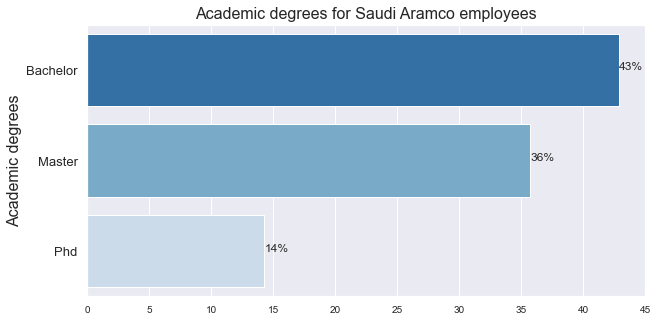

In [192]:
# plot1 real 

fig, ax= plt.subplots(figsize =(10,5))
#ns.set_style('whitegrid')
sns.set_context('notebook')
sns.set(font_scale=1)
plt.fontsize =(16)

ax=sns.barplot(palette="Blues_r",ax=ax,

            x=Academicـdegrees['SchoolDegree'],y=Academicـdegrees['index'])
total=len(Academicـdegrees['index'])
for p in ax.patches:
    percentage ='{:,.0f}%'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

plt.xticks(rotation =0,fontsize =10)
plt.yticks(rotation =0,fontsize =13)

plt.title('Academic degrees for Saudi Aramco employees',
         fontsize =16
         )
plt.xlabel ('',fontsize =16)
plt.ylabel ('Academic degrees',fontsize =16)

plt.show ()

# Sabic company 

In [193]:
sabic = df[df['company']=='sabic'] 
sabic.shape

(33, 17)

In [194]:
sabic['school']= sabic['school'].str.replace('king fahd university of petroleum & minerals - kfupm','king fahd university of petroleum & minerals')
sabic['school']= sabic['school'].str.replace('king fahd university of petroleum and minerals','king fahd university of petroleum & minerals')

/var/folders/q9/r2j6s5gj6vqbgwbptm3ztjsc0000gn/T/ipykernel_1891/1450876884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sabic['school']= sabic['school'].str.replace('king fahd university of petroleum & minerals - kfupm','king fahd university of petroleum & minerals')
/var/folders/q9/r2j6s5gj6vqbgwbptm3ztjsc0000gn/T/ipykernel_1891/1450876884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sabic['school']= sabic['school'].str.replace('king fahd university of petroleum and minerals','king fahd unive

In [195]:
# Universities that graduated SABIC employees
sabic_uni = (sabic['school'].value_counts(normalize=True)*100).head()
sabic_uni 

king fahd university of petroleum & minerals    24.242424
king faisal university                          12.121212
imam abdulrahman bin faisal university           9.090909
king saud university                             9.090909
jubail university college                        6.060606
Name: school, dtype: float64

In [196]:
# Save the output in the data frame and add a variable in which the index is saved
sabic_uni = sabic_uni.to_frame()
sabic_uni['index'] = sabic_uni.index
sabic_uni

,school,index
king fahd university of petroleum & minerals,24.242424,king fahd university of petroleum & minerals
king faisal university,12.121212,king faisal university
imam abdulrahman bin faisal university,9.090909,imam abdulrahman bin faisal university
king saud university,9.090909,king saud university
jubail university college,6.060606,jubail university college


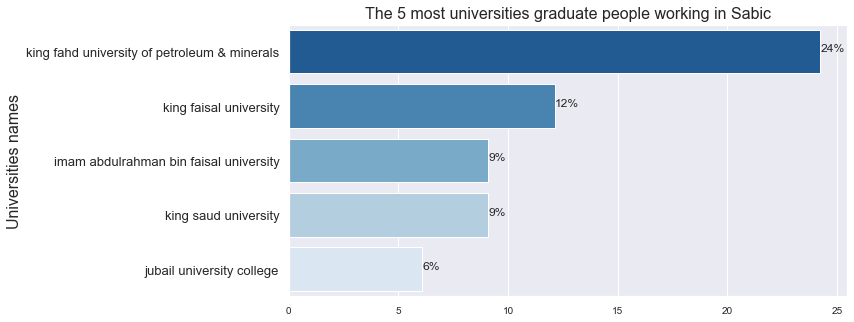

In [197]:
# plot1 real 

fig, ax= plt.subplots(figsize =(10,5))
#ns.set_style('whitegrid')
sns.set_context('notebook')
sns.set(font_scale=1)
plt.fontsize =(16)

ax=sns.barplot(palette="Blues_r",ax=ax,

            x=sabic_uni['school'],y=sabic_uni['index'])
total=len(sabic_uni['index'])
for p in ax.patches:
    percentage ='{:,.0f}%'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

plt.xticks(rotation =0,fontsize =10)
plt.yticks(rotation =0,fontsize =13)

plt.title('The 5 most universities graduate people working in Sabic',
         fontsize =16
         )
plt.xlabel ('',fontsize =16)
plt.ylabel ('Universities names',fontsize =16)

plt.show ()

In [198]:
# Departments of employees of Aramco
sabic_degree = sabic['SchoolDegree'].value_counts(normalize=True)*100
#sabic_degree = sabic_degree.drop(labels = ['Unkown']) 
sabic_degree 

Computer Science         42.424242
Information Systems      27.272727
Software Engineeringe    21.212121
Unkown                    9.090909
Name: SchoolDegree, dtype: float64

In [199]:
# change the type saudi_aramco_degree ro data frame 
sabic_degree = sabic_degree.to_frame()
sabic_degree['index'] = sabic_degree.index
sabic_degree


,SchoolDegree,index
Computer Science,42.424242,Computer Science
Information Systems,27.272727,Information Systems
Software Engineeringe,21.212121,Software Engineeringe
Unkown,9.090909,Unkown


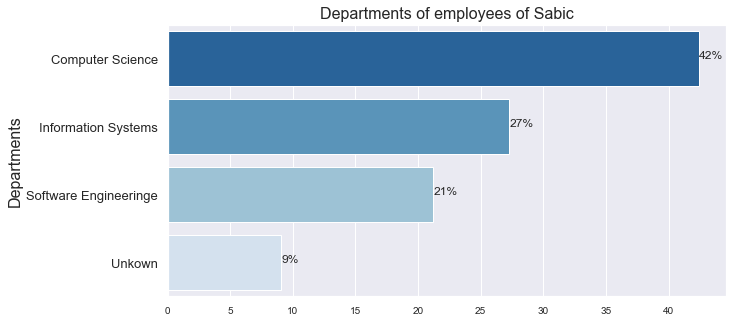

In [200]:
# plot1 real 

fig, ax= plt.subplots(figsize =(10,5))
#ns.set_style('whitegrid')
sns.set_context('notebook')
sns.set(font_scale=1)
plt.fontsize =(16)
# Determine the columns
ax=sns.barplot(palette="Blues_r",ax=ax,

            x=sabic_degree['SchoolDegree'],y=sabic_degree['index'])
total=len(sabic_degree['index'])
for p in ax.patches:
    percentage ='{:,.0f}%'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

plt.xticks(rotation =0,fontsize =10)
plt.yticks(rotation =0,fontsize =13)
#title
plt.title('Departments of employees of Sabic',
         fontsize =16
         )
plt.xlabel ('',fontsize =16)
plt.ylabel ('Departments',fontsize =16)

plt.show ()

In [201]:
# Merge all skills
skills= pd.concat(([sabic["skill1"],sabic["skill2"],sabic["skill3"],sabic["skill4"],sabic["skill5"],sabic["skill6"]]),ignore_index=True, sort=False)

In [202]:
# Convert the output to a data frame
skills = skills.to_frame()

In [203]:
# Save all skills in a new varible
skills['s']= pd.concat(([sabic["skill1"],sabic["skill2"],sabic["skill3"],sabic["skill4"],sabic["skill5"],sabic["skill6"]]),ignore_index=True, sort=False)

In [204]:
## Convert the output to a str
skills['s']= skills['s'].astype(str)

In [205]:
# apply finction find_skills
skills['Type'] = skills['s'].apply(find_skills) 

In [206]:
skills.head()

,0,s,Type
0,Microsoft Office,Microsoft Office,Unkown
1,Data Analysis,Data Analysis,Unkown
2,Java,Java,programming languages
3,Big Data,Big Data,Unkown
4,Software Engineering,Software Engineering,Unkown


In [207]:
#Determining programming language skills only
programming_languages = skills[skills['Type']=='programming languages'] 
programming_languages.head(10) 

,0,s,Type
2,Java,Java,programming languages
11,Java,Java,programming languages
15,Python,Python,programming languages
18,SQL,SQL,programming languages
20,Java,Java,programming languages
33,Java,Java,programming languages
40,Python (Programming Language),Python (Programming Language),programming languages
44,SQL,SQL,programming languages
51,C#,C#,programming languages
55,C++,C++,programming languages


In [208]:
# Save the top 10 programming languages that have been repeated
top_skills = (programming_languages['s'].value_counts(normalize=True)*100)
top_skills = top_skills.to_frame()
top_skills['index']=top_skills.index

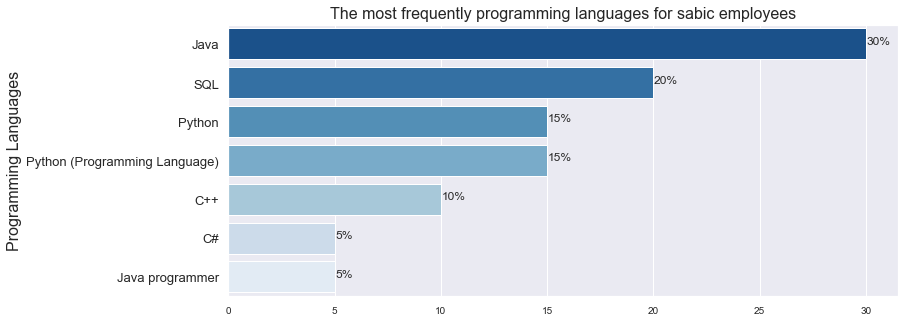

In [209]:
# plot1 real 

fig, ax= plt.subplots(figsize =(12,5))
#ns.set_style('whitegrid')
sns.set_context('notebook')
sns.set(font_scale=1)
plt.fontsize =(16)

ax=sns.barplot(palette="Blues_r",ax=ax,

            x=top_skills['s'],y=top_skills['index'])
total=len(top_skills['index'])
for p in ax.patches:
    percentage ='{:,.0f}%'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

plt.xticks(rotation =0,fontsize =10)
plt.yticks(rotation =0,fontsize =13)

plt.title('The most frequently programming languages for sabic employees',
         fontsize =16
         )
plt.xlabel ('',fontsize =16)
plt.ylabel ('Programming Languages',fontsize =16)

plt.show ()

In [210]:
#Determining programming language skills only
Soft_skills = skills[skills['Type']=='Soft skills'] 
Soft_skills.head(10) 

,0,s,Type
10,Project Management,Project Management,Soft skills
16,Team Leadership,Team Leadership,Soft skills
21,Teamwork,Teamwork,Soft skills
23,Project Management,Project Management,Soft skills
26,Leadership,Leadership,Soft skills
27,Project Management,Project Management,Soft skills
30,Project Management,Project Management,Soft skills
34,Project Management,Project Management,Soft skills
35,Teamwork,Teamwork,Soft skills
49,Project Management,Project Management,Soft skills


In [211]:
# Determine the most frequent soft skills
top_skills = (Soft_skills['s'].value_counts(normalize=True)*100).head(10)
top_skills = top_skills.to_frame()
top_skills['index']=top_skills.index 

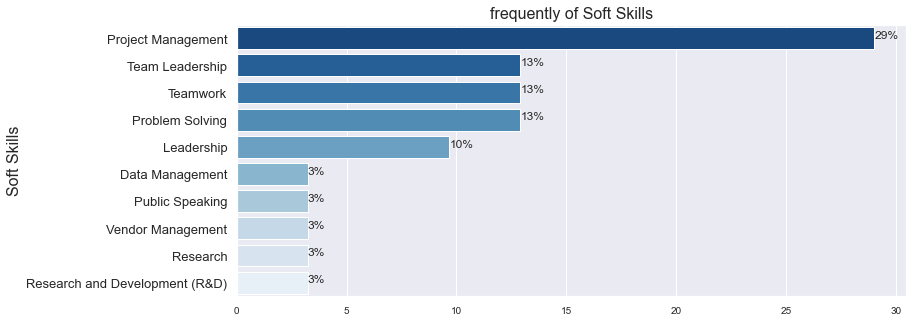

In [212]:
# plot1 real 

fig, ax= plt.subplots(figsize =(12,5))
#ns.set_style('whitegrid')
sns.set_context('notebook')
sns.set(font_scale=1)
plt.fontsize =(16)

ax=sns.barplot(palette="Blues_r",ax=ax,

            x=top_skills['s'],y=top_skills['index'])
total=len(top_skills['index'])
for p in ax.patches:
    percentage ='{:,.0f}%'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

plt.xticks(rotation =0,fontsize =10)
plt.yticks(rotation =0,fontsize =13)

plt.title('frequently of Soft Skills',
         fontsize =16
         ) 
plt.xlabel ('',fontsize =16)
plt.ylabel ('Soft Skills',fontsize =16)

plt.show ()

In [213]:
# using vectorize from numpy 
sabic.loc[:,'SchoolDegree'] = np.vectorize(schoolDegree, otypes=["O"]) (sabic['schoolDegree'], sabic['schoolDegree2'])

/var/folders/q9/r2j6s5gj6vqbgwbptm3ztjsc0000gn/T/ipykernel_1891/4190698059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sabic.loc[:,'SchoolDegree'] = np.vectorize(schoolDegree, otypes=["O"]) (sabic['schoolDegree'], sabic['schoolDegree2'])


In [214]:
# Returning academic degrees to sabic employees
Academicـdegrees = sabic['SchoolDegree'].value_counts(normalize=True)*100
Academicـdegrees

Bachelor    63.636364
Master      27.272727
Unkown       9.090909
Name: SchoolDegree, dtype: float64

In [215]:
# converty the output to data frame and save the index in new varible 
Academicـdegrees = Academicـdegrees.to_frame()
Academicـdegrees['index'] = Academicـdegrees.index
Academicـdegrees




,SchoolDegree,index
Bachelor,63.636364,Bachelor
Master,27.272727,Master
Unkown,9.090909,Unkown


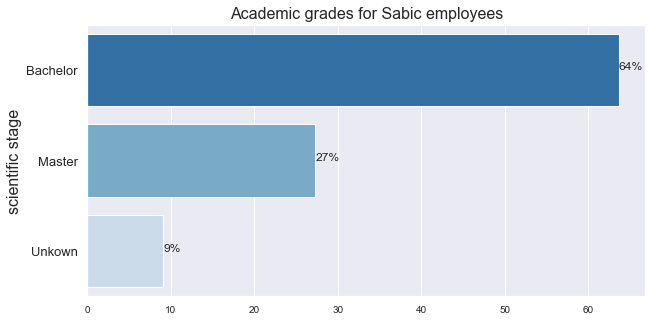

In [216]:
# plot1 real 

fig, ax= plt.subplots(figsize =(10,5))
#ns.set_style('whitegrid')
sns.set_context('notebook')
sns.set(font_scale=1)
plt.fontsize =(16)

ax=sns.barplot(palette="Blues_r",ax=ax,

            x=Academicـdegrees['SchoolDegree'],y=Academicـdegrees['index'])
total=len(Academicـdegrees['index'])
for p in ax.patches:
    percentage ='{:,.0f}%'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

plt.xticks(rotation =0,fontsize =10)
plt.yticks(rotation =0,fontsize =13)

plt.title('Academic grades for Sabic employees',
         fontsize =16
         )
plt.xlabel ('',fontsize =16)
plt.ylabel ('scientific stage',fontsize =16)

plt.show ()

### I would like to know what skills a graduate of a particular university possesses? And what organizations do they join?

In [217]:
#Choosing King Saud University
ksu_student = df[df['school'] =='king saud university']

In [218]:
ksu =(ksu_student['company2'].value_counts(normalize=True) *100).head(10)

In [219]:
ksu
ksu = ksu.drop(labels = ['SDAIA Academy','Saudi Digital Academy']) 


In [220]:
KSU = ksu.to_frame()


In [221]:
KSU['index']=KSU.index

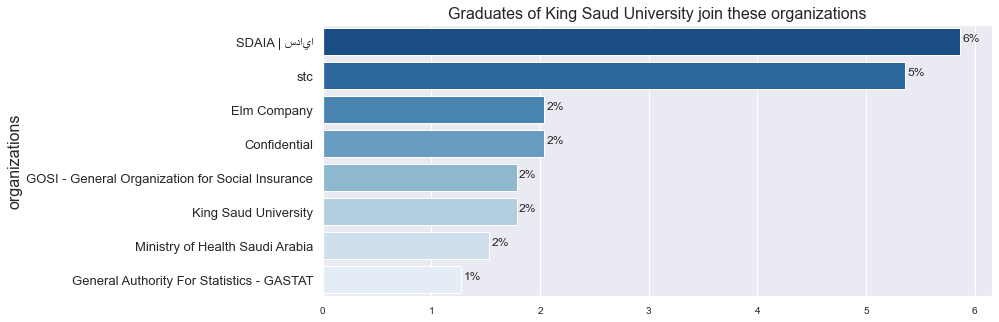

In [222]:
# plot1 real 

fig, ax= plt.subplots(figsize =(12,5))
#ns.set_style('whitegrid')
sns.set_context('notebook')
sns.set(font_scale=1)
plt.fontsize =(16)

ax=sns.barplot(palette="Blues_r",ax=ax,

            x=KSU['company2'],y=KSU['index'])
total=len(KSU['index'])
for p in ax.patches:
    percentage ='{:,.0f}%'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

plt.xticks(rotation =0,fontsize =10)
plt.yticks(rotation =0,fontsize =13)

plt.title('Graduates of King Saud University join these organizations',
         fontsize =16
         )  
plt.xlabel ('',fontsize =16)
plt.ylabel ('organizations',fontsize =16)

plt.show ()

In [223]:
skills= pd.concat(([ksu_student["skill1"],ksu_student["skill2"],ksu_student["skill3"],ksu_student["skill4"],ksu_student["skill5"],ksu_student["skill6"]]),ignore_index=True, sort=False)


In [224]:
skills.head()

0    Project Management
1               Tableau
2     Analytical Skills
3         Data Analysis
4         Data Analysis
dtype: object

In [225]:
skills = skills.to_frame() 

In [226]:
skills['s']= pd.concat(([ksu_student["skill1"],ksu_student["skill2"],ksu_student["skill3"],ksu_student["skill4"],ksu_student["skill5"],ksu_student["skill6"]]),ignore_index=True, sort=False)


In [227]:
def find_skills(s):
    if( s.find('SQL') != -1 or s.find('Java') != -1  or s.find('R ') != -1 or s.find('C++') != -1 or s.find('Python') != -1 or  
        s.find('MySQL') != -1 or s.find('C#') != -1 or s.find('PHP') != -1 or  s.find('R (Programming Language)') != -1 
         or s.find('PL/SQL') != -1 or s.find('ASP.NET') != -1 or s.find('React.js') != -1 or s.find('java') != -1 or
         s.find('Flutter') != -1 or s.find('.NET') != -1 or s.find('.NET') != -1 or s.find('R Programing') != -1 or s.find('JavaScript') != -1):  
        return 'programming languages'
    # elif( s.find('Microsoft Office') != -1 or s.find('Tableau') != -1  or s.find('Microsoft SQL Server') != -1 or s.find('Microsoft Excel') != -1 or s.find('Matlab') != -1 
      #  or s.find('Kubernetes') != -1 or s.find('SAS') != -1 or s.find('Amazon S3') != -1 or s.find('Linux') != -1 or  s.find('Databases') != -1 
      #   or s.find('User Experience (UX)') != -1 or s.find('SDLC') != -1 or s.find('Machine Learning') != -1 or s.find('Data Visualization') != -1 or
      #   s.find('Data Science') != -1 or s.find('Data Analysis') != -1 or s.find('Data Mining') != -1 or s.find('Business Intelligence') != -1 
      #   or s.find('Research') != -1 or s.find('Enterprise Project Management (EPM)') != -1 or s.find('ERP)') != -1 or s.find('Artificial intelligence (AI)') != -1
      #   or s.find('Cloud Computing') != -1 or s.find('Deep Learning') != -1 or s.find('Cybersecurity') != -1 or s.find('Statistics') != -1 or s.find(' Web Scraping') != -1
      #   or s.find('Information Security') != -1 or s.find('Internet of Things') != -1 or s.find('Geophysics') != -1 or s.find('AWS IoT') != -1 or s.find('SPSS') != -1
      #   or s.find('Web Development') != -1 or s.find('Big Data Analytics') != -1 or s.find('Computer Vision') != -1 or s.find('NLP') != -1 or s.find('Power pi') != -1
      #   or s.find('Microsoft Power BI') != -1 or s.find('ETL') != -1 ): 
      #  return 'technical concepts' 
    
    
    elif( s.find('Communication skills') != -1 or s.find('Management') != -1  or s.find('Public Speaking') != -1 or s.find('Teamwork') != -1 or s.find('Problem Solving') != -1 
        or s.find('Time management') != -1 or s.find('Problem Solving') != -1 or s.find('Leadership') != -1 or s.find('Team Leadership') != -1 or  s.find('statistical reports') != -1 
         or s.find('Research') != -1 or s.find('Project Management') != -1 or s.find('Self Learning') != -1 or s.find('Critical Thinking') != -1 ): 
        return 'Soft skills'
    
    else:
        return 'Unkown'

In [228]:
skills['s']= skills['s'].astype(str)


In [229]:
skills['Type'] = skills['s'].apply(find_skills) 

In [230]:
programming_languages = skills[skills['Type']=='programming languages'] 
programming_languages.head(10) 

,0,s,Type
8,Python,Python,programming languages
15,SQL,SQL,programming languages
16,Python,Python,programming languages
25,Python (Programming Language),Python (Programming Language),programming languages
26,Python (Programming Language),Python (Programming Language),programming languages
32,Python (Programming Language),Python (Programming Language),programming languages
33,Python,Python,programming languages
37,Python,Python,programming languages
38,Java,Java,programming languages
44,Python (Programming Language),Python (Programming Language),programming languages


In [231]:
top_skills = (programming_languages['s'].value_counts(normalize=True)*100).head(10)

In [232]:
top_skills = top_skills.to_frame()
top_skills['index']=top_skills.index

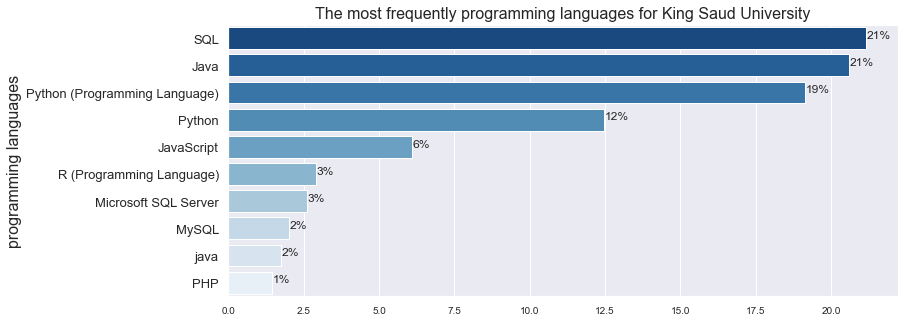

In [233]:
# plot1 real 

fig, ax= plt.subplots(figsize =(12,5))
#ns.set_style('whitegrid')
sns.set_context('notebook')
sns.set(font_scale=1)
plt.fontsize =(16)

ax=sns.barplot(palette="Blues_r",ax=ax,

            x=top_skills['s'],y=top_skills['index'])
total=len(top_skills['index'])
for p in ax.patches:
    percentage ='{:,.0f}%'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

plt.xticks(rotation =0,fontsize =10)
plt.yticks(rotation =0,fontsize =13)

plt.title("The most frequently programming languages for King Saud University",
         fontsize =16
         )
plt.xlabel ('',fontsize =16)
plt.ylabel ('programming languages',fontsize =16)

plt.show ()

In [234]:
programming_languages = skills[skills['Type']=='Soft skills'] 
programming_languages.head(10) 

,0,s,Type
0,Project Management,Project Management,Soft skills
10,Problem Solving,Problem Solving,Soft skills
14,Time management,Time management,Soft skills
17,Problem Solving,Problem Solving,Soft skills
28,Project Management,Project Management,Soft skills
34,Leadership,Leadership,Soft skills
43,Teamwork,Teamwork,Soft skills
53,Project Management,Project Management,Soft skills
67,Project Management,Project Management,Soft skills
70,Teamwork,Teamwork,Soft skills


In [235]:
top_skills = (programming_languages['s'].value_counts(normalize=True)*100).head(10)

In [236]:
top_skills = top_skills.to_frame()
top_skills['index']=top_skills.index

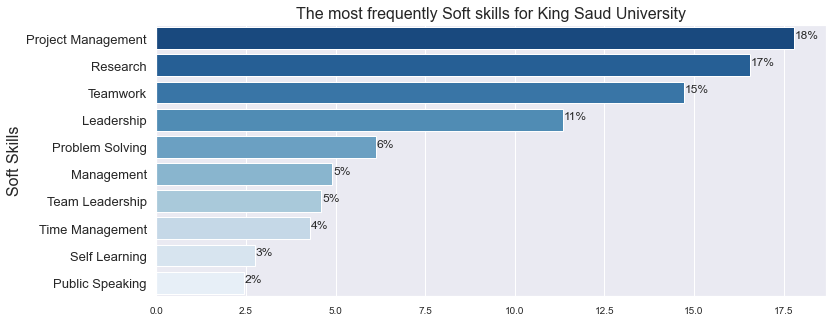

In [237]:
# plot1 real 

fig, ax= plt.subplots(figsize =(12,5))
#ns.set_style('whitegrid')
sns.set_context('notebook')
sns.set(font_scale=1)
plt.fontsize =(16)

ax=sns.barplot(palette="Blues_r",ax=ax,

            x=top_skills['s'],y=top_skills['index'])
total=len(top_skills['index'])
for p in ax.patches:
    percentage ='{:,.0f}%'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

plt.xticks(rotation =0,fontsize =10)
plt.yticks(rotation =0,fontsize =13)

plt.title("The most frequently Soft skills for King Saud University",
         fontsize =16
         )
plt.xlabel ('',fontsize =16)
plt.ylabel ('Soft Skills',fontsize =16)

plt.show ()